# Question 1

In [ ]:
import pandas as pd
PATH = "/content/2019 Winter Data Science Intern Challenge Data Set.xlsx"

df = pd.read_excel(PATH)
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   float64       
 1   shop_id         5000 non-null   float64       
 2   user_id         5000 non-null   float64       
 3   order_amount    5000 non-null   float64       
 4   total_items     5000 non-null   float64       
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 273.6+ KB


In [ ]:
#Check for missing values
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [ ]:
#Total order
df['order_id'].count()

5000

In [ ]:
## find stats about order cost
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

###**(a)**


From above data we can observe that min value of order is 90 while maximum value is 70400, so the range is quite vast. 
Higher std deviation indicates that the values are far apart, thus higher proability of outliers.

Further if we look at percentiles, we observe that 75% of data is less than 390 value, which is much less than mean (average). Thus, we can conclude that average cost is influenced by few sales with high cost. But majority(75%) of the sales are less than 400.

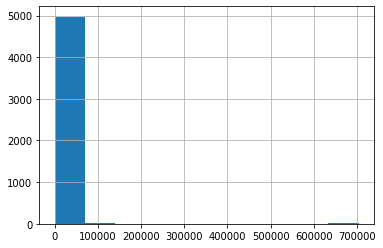

In [ ]:
df['order_amount'].hist()

From histogram, we can observe that there are very few orders in range of 700000. These must be due to bulk order of items. Let's explore number of items in those orders. 

In [ ]:
df7 = df[df['order_amount']>700000]
df7

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 04:00:00
60,61.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-04 04:00:00
520,521.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-02 04:00:00
1104,1105.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-24 04:00:00
1362,1363.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-15 04:00:00
1436,1437.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-11 04:00:00
1562,1563.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-19 04:00:00
1602,1603.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-17 04:00:00
2153,2154.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-12 04:00:00
2297,2298.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 04:00:00


If we observe above data, we can see that one user (userid=607) has made several bulk order in the month of March in 2017. The total number of items ordered is 2000 in this case. So cost per sneaker would be 704000/2000 = 352.
This looks like a bit expensive value contradicting "affordable sneakers" in the problem statement.

In [ ]:
df7.shape

(17, 7)

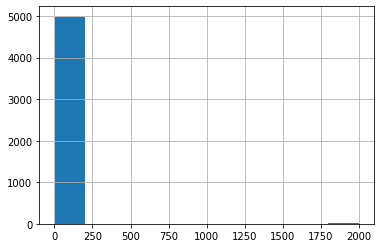

In [ ]:
df['total_items'].hist()

In [ ]:
df[df['total_items'] > 1750].shape

(17, 7)

There are total 17 orders out of 5000 made by one user that has caused the data to be skewed. Effect of such outliers can be reduced by using Metrics like Median (middle value) or Mode (most frequent value) for order_amount.

In [ ]:
print("Mean : ", df['order_amount'].mean())
print("Median : ", df['order_amount'].median())
print("Mode : ", df['order_amount'].mode())

Mean :  3145.128
Median :  284.0
Mode :  0    153.0
dtype: float64


As we can observe,  Median and Mode metrics are quite closer to AOV , compared to Mean.

###**(b)**

I would prefer Median (middle value) for this dataset, as it is less sensitive to outliers. 

###**(c)**

Median Value is 284

# Question 2

Solution is written in the document available in this same repository.